# <center><h1>Diabetes Prediction</h1></center>

<h2>Introduction</h2>
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. Random women were selected for the observations with age 21 or above.

<h2>Dataset Description</h2>
The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset.


<ol>
    <li>Pregnancies: Number of times pregnant
<li>Glucose: Plasma glucose concentration 2 hours in an oral glucose tolerance test
<li>Blood Pressure: Diastolic blood pressure (mm Hg)
<li>Skin Thickness: Triceps skin fold thickness (mm
<li>Insulin: 2-Hour serum insulin (mu U/ml)
<li>BMI: Body mass index (weight in kg/(height in m)^2) 
<li>Diabetes Pedigree Function: Diabetes pedigree function
<li>Age: Age (years)
<li>Outcome: Class variable (0 or 1) 0 mean non-diabetic and 1 means diabetic</ol>

<h2>Objective</h2>
The objective is to predict based on diagnostic measurements whether a patient has diabetes.

<h2>Importing Libraries</h2>

In [1]:
#mporting numpy for working with arrays
import numpy as np 

#importing pandas for creating dataframes
import pandas as pd 

#importing matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#loading the pima diabetes dataset
df=pd.read_excel(r'pima-indians-diabetes_2-Copy1.xlsx',header=None)

In [3]:
#naming the column names of the dataset
df.columns=['Pregnancies','Glucose','Blood_Pressure','Skin_Thickness','Insulin','BMI','Diabetic_Pedigree_Function','Age','Outcome']

In [4]:
#getting peek of the first five observations
df.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetic_Pedigree_Function,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [5]:
#getting peek of last five observations
df.tail()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetic_Pedigree_Function,Age,Outcome
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0
767,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,0.0


In [6]:
#checking the shape of the dataframe
df.shape

(768, 9)

In [7]:
#checking the data type of the dataset
df.dtypes

Pregnancies                   float64
Glucose                       float64
Blood_Pressure                float64
Skin_Thickness                float64
Insulin                       float64
BMI                           float64
Diabetic_Pedigree_Function    float64
Age                           float64
Outcome                       float64
dtype: object

Aftering loading and reading the dataset, it is known that the dataset has 768 rows(observations) and 9 columns(variables). All columns has datatype float.

<h2>Change in Datatype</h2>

As, The 'Outcome' column indicates whether patient is diabetic, it is not possible to keep it float as a datatype. Hence, the datatype of 'Outcome' must be changed to object.

In [8]:
#changing datatype of 'Outcome' variable from float to string/object
df.Outcome=df.Outcome.astype(str)

In [9]:
#checking the datatype of Outcome variable
df.Outcome.dtypes

dtype('O')

The datatype of the 'Outcome' variable has changed from float to object/string.

<h2>Missing/Null Values</h2>

In [10]:
#checking the presence of null values in the dataset
df.isnull().sum()

Pregnancies                   0
Glucose                       0
Blood_Pressure                0
Skin_Thickness                0
Insulin                       0
BMI                           0
Diabetic_Pedigree_Function    0
Age                           0
Outcome                       0
dtype: int64

After checking for the null values, it is seen that there are no null values in the dataset.

In [11]:
#checking the count, mean, std, min, max in the dataset
df.describe()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetic_Pedigree_Function,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


After using the describe function to see the five points summary, it is seen that some columns has inappropriate values which is practically not possible. The inappropriate values in the columns are,
<ul><li>0 : in 'Glucose'
    <li>0 : in 'Blood_Pressure'
    <li>0 : in 'Skin_Thickness'
    <li>0 : in 'Insulin'
    <li>0 : in 'BMI'</ul>
As, these values in the respective columns are not appropriate, it must be replaced.


In [12]:
#replacing the inappropriate values with NaN values in the dataset
df.iloc[:,1:6]=df.iloc[:,1:6].replace(0,np.nan)

In [13]:
#Rechecking the null values in the dataset
df.isnull().sum()

Pregnancies                     0
Glucose                         5
Blood_Pressure                 35
Skin_Thickness                227
Insulin                       374
BMI                            11
Diabetic_Pedigree_Function      0
Age                             0
Outcome                         0
dtype: int64

The dataset has null values in the columns '**Glucose**','**Blood_Pressure**','**Skin_Thickness**','**Insulin**' and '**BMI**'. 

<h2>Filling Missing/Null Values</h2>

KNN(K-Nearest Neighbours) imputation method is used to fill the missing values in the dataset.

In [14]:
from fancyimpute import KNN #importing KNN from fancyimpute
knn_imputer=KNN() 
df_knn=df.copy(deep=True) #creating copy to apply imputation
df_knn.iloc[:,:]=knn_imputer.fit_transform(df_knn) #imputing the missing/null values in the dataset

Imputing row 1/768 with 1 missing, elapsed time: 0.122
Imputing row 101/768 with 2 missing, elapsed time: 0.124
Imputing row 201/768 with 1 missing, elapsed time: 0.124
Imputing row 301/768 with 3 missing, elapsed time: 0.124
Imputing row 401/768 with 2 missing, elapsed time: 0.124
Imputing row 501/768 with 0 missing, elapsed time: 0.124
Imputing row 601/768 with 1 missing, elapsed time: 0.124
Imputing row 701/768 with 0 missing, elapsed time: 0.141


The KNN imputation technique has been performed. 

In [15]:
#Rechecking the count, mean, std, min, max in the dataset after KNN imputation
df_knn.describe()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetic_Pedigree_Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.584935,72.390351,29.123094,153.843883,32.433551,0.471876,33.240885,0.348958
std,3.369578,30.530450,12.212685,9.496809,99.614837,6.885187,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.919593,88.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.085087,132.218586,32.150000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,35.000000,188.904879,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The missing/null values in the dataset has been replaced with appropriate values.

As, the outcome column is string column, hence it must be changed to string(object) datatype.

In [16]:
df_knn['Outcome']=df_knn['Outcome'].astype(str)

<h2>Duplicates Rows in the Dataset</h2>

In [17]:
df_knn.duplicated().sum()

0

No duplicate rows have been found in the dataset.

<h2>Distribution of the Dataset</h2>

In [18]:
#selecting all columns with numeric values in the dataset
numeric_col=df_knn.select_dtypes(include='number').columns
print(numeric_col)

Index(['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       'BMI', 'Diabetic_Pedigree_Function', 'Age'],
      dtype='object')


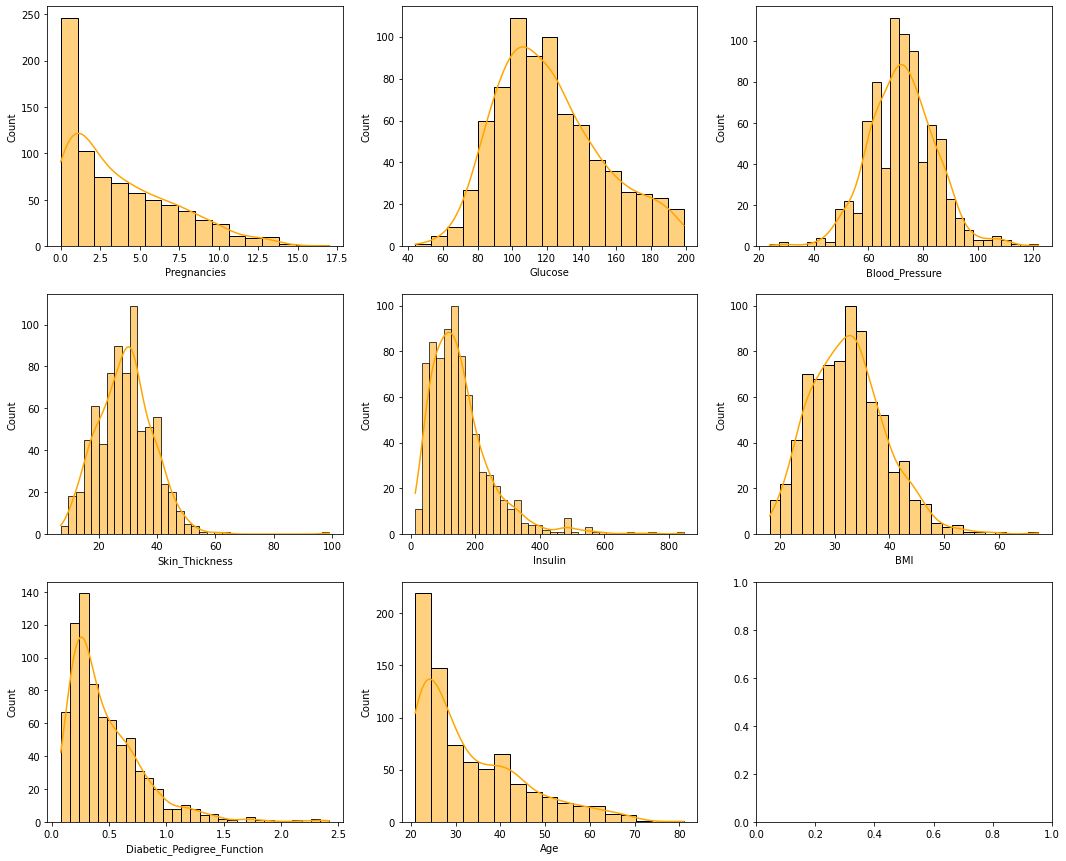

In [19]:
#creating subplot and plotting all the columns with numeric values into histogram to see the distribution of the dataset
_,ax = plt.subplots(3,3,figsize=(18,15))
for i in range(len(numeric_col)):
    sns.histplot(data=df_knn[numeric_col[i]],ax=ax[i//3][i%3],kde=True,color='orange')

In [20]:
#Using skew() function to check the numeric value of the skewness
for i in range(len(numeric_col)):
    print(f'{numeric_col[i]} : {df_knn[numeric_col[i]].skew()}')

Pregnancies : 0.9016739791518588
Glucose : 0.5317056955294653
Blood_Pressure : 0.13621735924152842
Skin_Thickness : 0.6620965256243191
Insulin : 2.084493350060858
BMI : 0.6044507693129424
Diabetic_Pedigree_Function : 1.919911066307204
Age : 1.1295967011444805


<center><h3>Skewness Scale</h3></center>

|Range|Skewness|
|---|---|
|-0.5 to 0, 0 to 0.5|Fairly Symmetrical|
|-0.5 to -1, 0.5 to 1| Moderately Symmetrical|
|< -1, 1 > | Highly Skewed

By comparing the Skewness Scale with the numeric columns in the dataset, it is seen that;

|Column|Skewness|
|---|---|
|Blood_Pressure|Fairly Symmetrical|
|Pregnancies,Glucose,Skin_Thickness,BMI| Moderately Symmetrical|
|Insulin,Diabetic_Pedigree_Function,Age| Highly Skewed

In [21]:
#creating a copy to perform transformation on the dataset
df_knn_transform=df_knn.copy(deep=True)

In [22]:
#transforming the numeric variables using square root transformation
df_knn_transform['Pregnancies']=np.sqrt(df_knn_transform['Pregnancies'])
df_knn_transform['Glucose']=np.sqrt(df_knn_transform['Glucose'])
df_knn_transform['Blood_Pressure']=np.sqrt(df_knn_transform['Blood_Pressure'])
df_knn_transform['Skin_Thickness']=np.sqrt(df_knn_transform['Skin_Thickness'])
df_knn_transform['Insulin']=np.sqrt(df_knn_transform['Insulin'])
df_knn_transform['BMI']=np.sqrt(df_knn_transform['BMI'])
df_knn_transform['Diabetic_Pedigree_Function']=np.sqrt(df_knn_transform['Diabetic_Pedigree_Function'])
df_knn_transform['Age']=np.sqrt(df_knn_transform['Age'])

In [23]:
#selecting numeric columns from the dataset
transform_numeric_col=df_knn_transform.select_dtypes(include='number').columns
print(transform_numeric_col)

Index(['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       'BMI', 'Diabetic_Pedigree_Function', 'Age'],
      dtype='object')


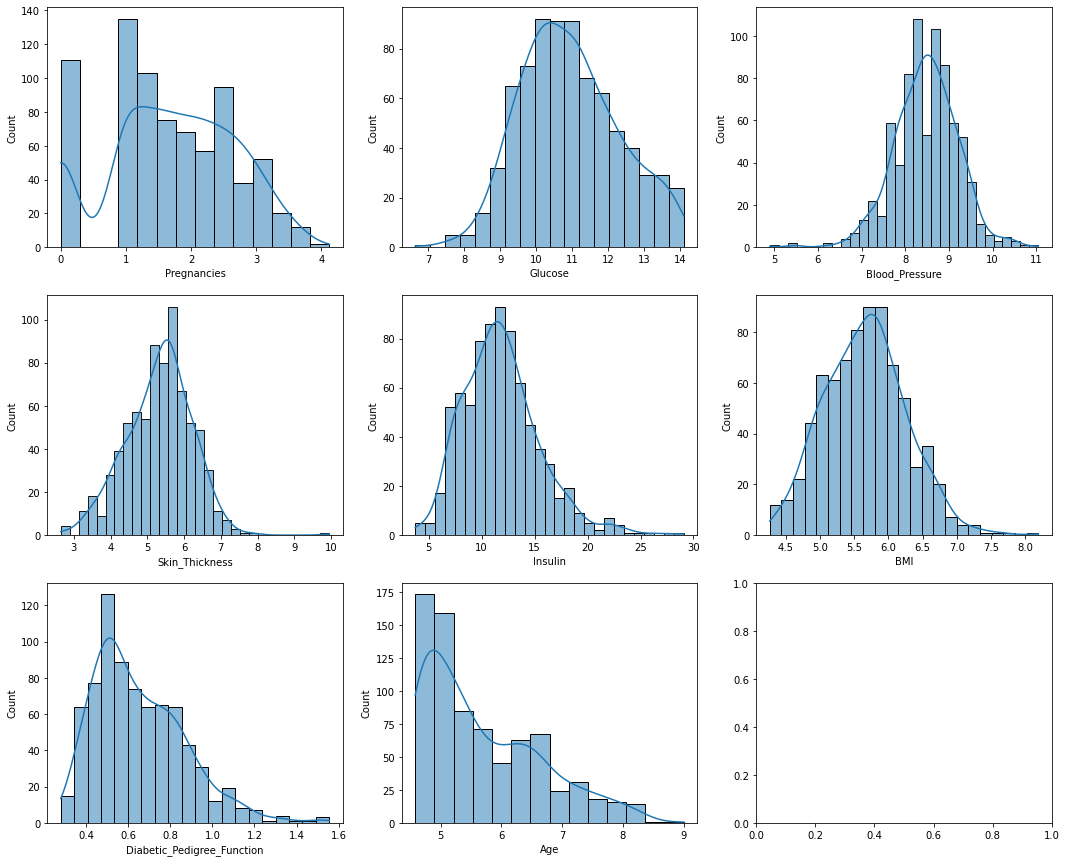

In [24]:
#creating subplot and plotting the numeric columns in the histogram to check the distribution of the dataset
_,ax = plt.subplots(3,3,figsize=(18,15))
for i in range(len(transform_numeric_col)):
    sns.histplot(data=df_knn_transform[transform_numeric_col[i]],ax=ax[i//3][i%3],kde=True)

In [25]:
#checking the numiercal skewness value of the numeric columns by using skew() function
for i in range(len(transform_numeric_col)):
    print(f'{transform_numeric_col[i]} : {df_knn_transform[transform_numeric_col[i]].skew()}')

Pregnancies : -0.15893792070470467
Glucose : 0.2527745423736729
Blood_Pressure : -0.2789072238971016
Skin_Thickness : -0.09479607895933223
Insulin : 0.8390208342790042
BMI : 0.26329537219723503
Diabetic_Pedigree_Function : 0.9018017197488095
Age : 0.8505983120345812


By using the square root transformation, it is seen that most of the numeric columns in the dataset has the distribution which is fairly symmetrical and moderately symmetrical.

<h2>Outliers in the Dataset</h2>

To check the presence of outliers in the dataset.

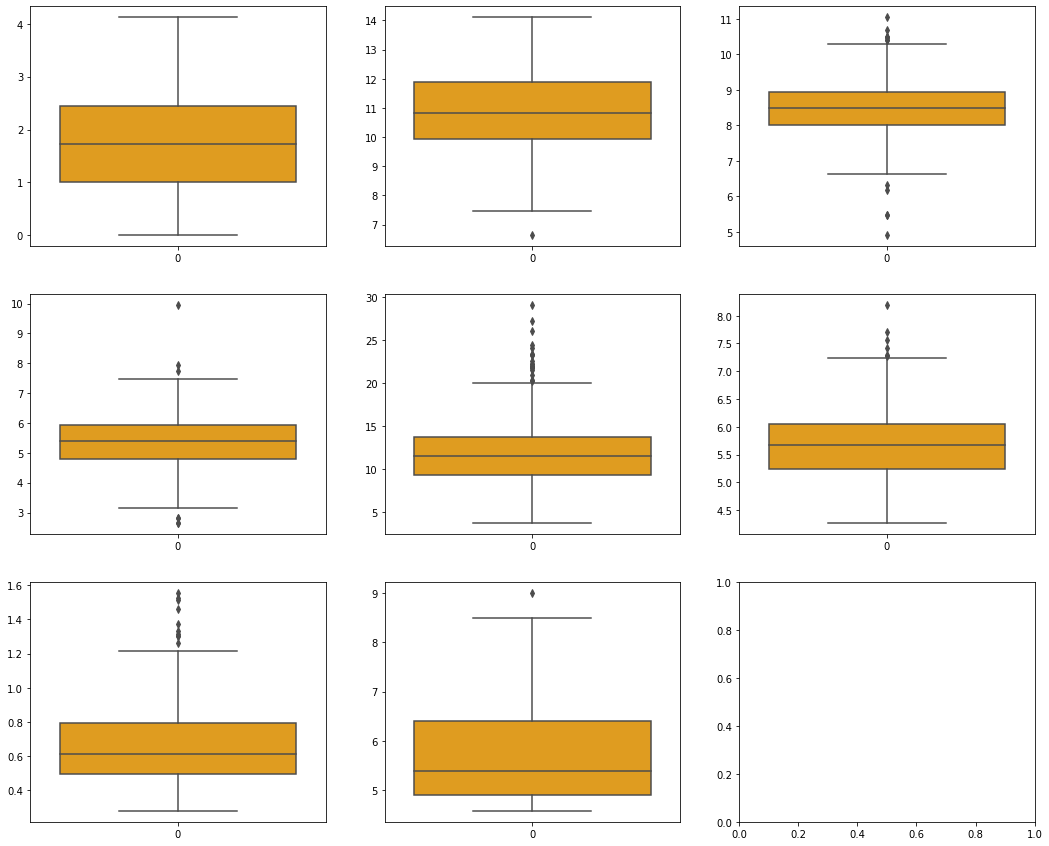

In [26]:
#creating subplot and plotting boxplot to check the outliers in the numeric columns
_,ax = plt.subplots(3,3,figsize=(18,15))
for i in range(len(transform_numeric_col)):
    sns.boxplot(data=df_knn_transform[transform_numeric_col[i]],ax=ax[i//3][i%3],color='orange')

The numeric columns in the dataset has presence of outliers./

In [27]:
#The outliers in the numeric columns are treated and values between 25th and 75th percentile is kept
cols = ['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       'BMI', 'Diabetic_Pedigree_Function', 'Age']

Q1 = df_knn_transform[cols].quantile(0.25) #25t percentile data
Q3 = df_knn_transform[cols].quantile(0.75) #75th percentile data
IQR = Q3 - Q1


df_knn_transform = df_knn_transform[~((df_knn_transform[cols] < (Q1 - 1.5 * IQR)) |(df_knn_transform[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


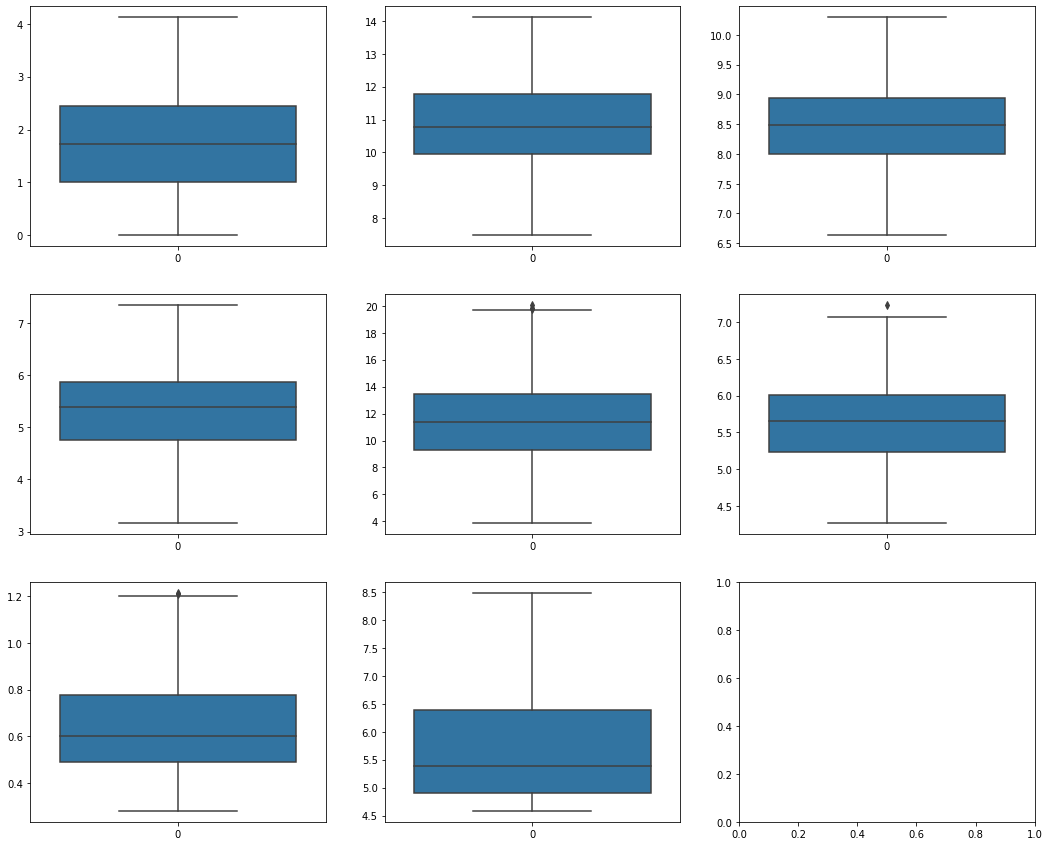

In [28]:
#creating subplots and plotting boxplot to see the outliers in the dataset after treating outliers
_,ax = plt.subplots(3,3,figsize=(18,15))
for i in range(len(transform_numeric_col)):
    
    sns.boxplot(data=df_knn_transform[transform_numeric_col[i]],ax=ax[i//3][i%3])

The outliers in the dataset has been reduced to large scale. 

In [29]:
#Checking general information of the final dataset
df_knn_transform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 718 non-null    float64
 1   Glucose                     718 non-null    float64
 2   Blood_Pressure              718 non-null    float64
 3   Skin_Thickness              718 non-null    float64
 4   Insulin                     718 non-null    float64
 5   BMI                         718 non-null    float64
 6   Diabetic_Pedigree_Function  718 non-null    float64
 7   Age                         718 non-null    float64
 8   Outcome                     718 non-null    object 
dtypes: float64(8), object(1)
memory usage: 72.3+ KB


dataset is cleaned.

<h2>Data Visualization</h2>

A pairplot is to be plotted to check the variability of one variable with respect to other variable.

<Figure size 1296x1296 with 0 Axes>

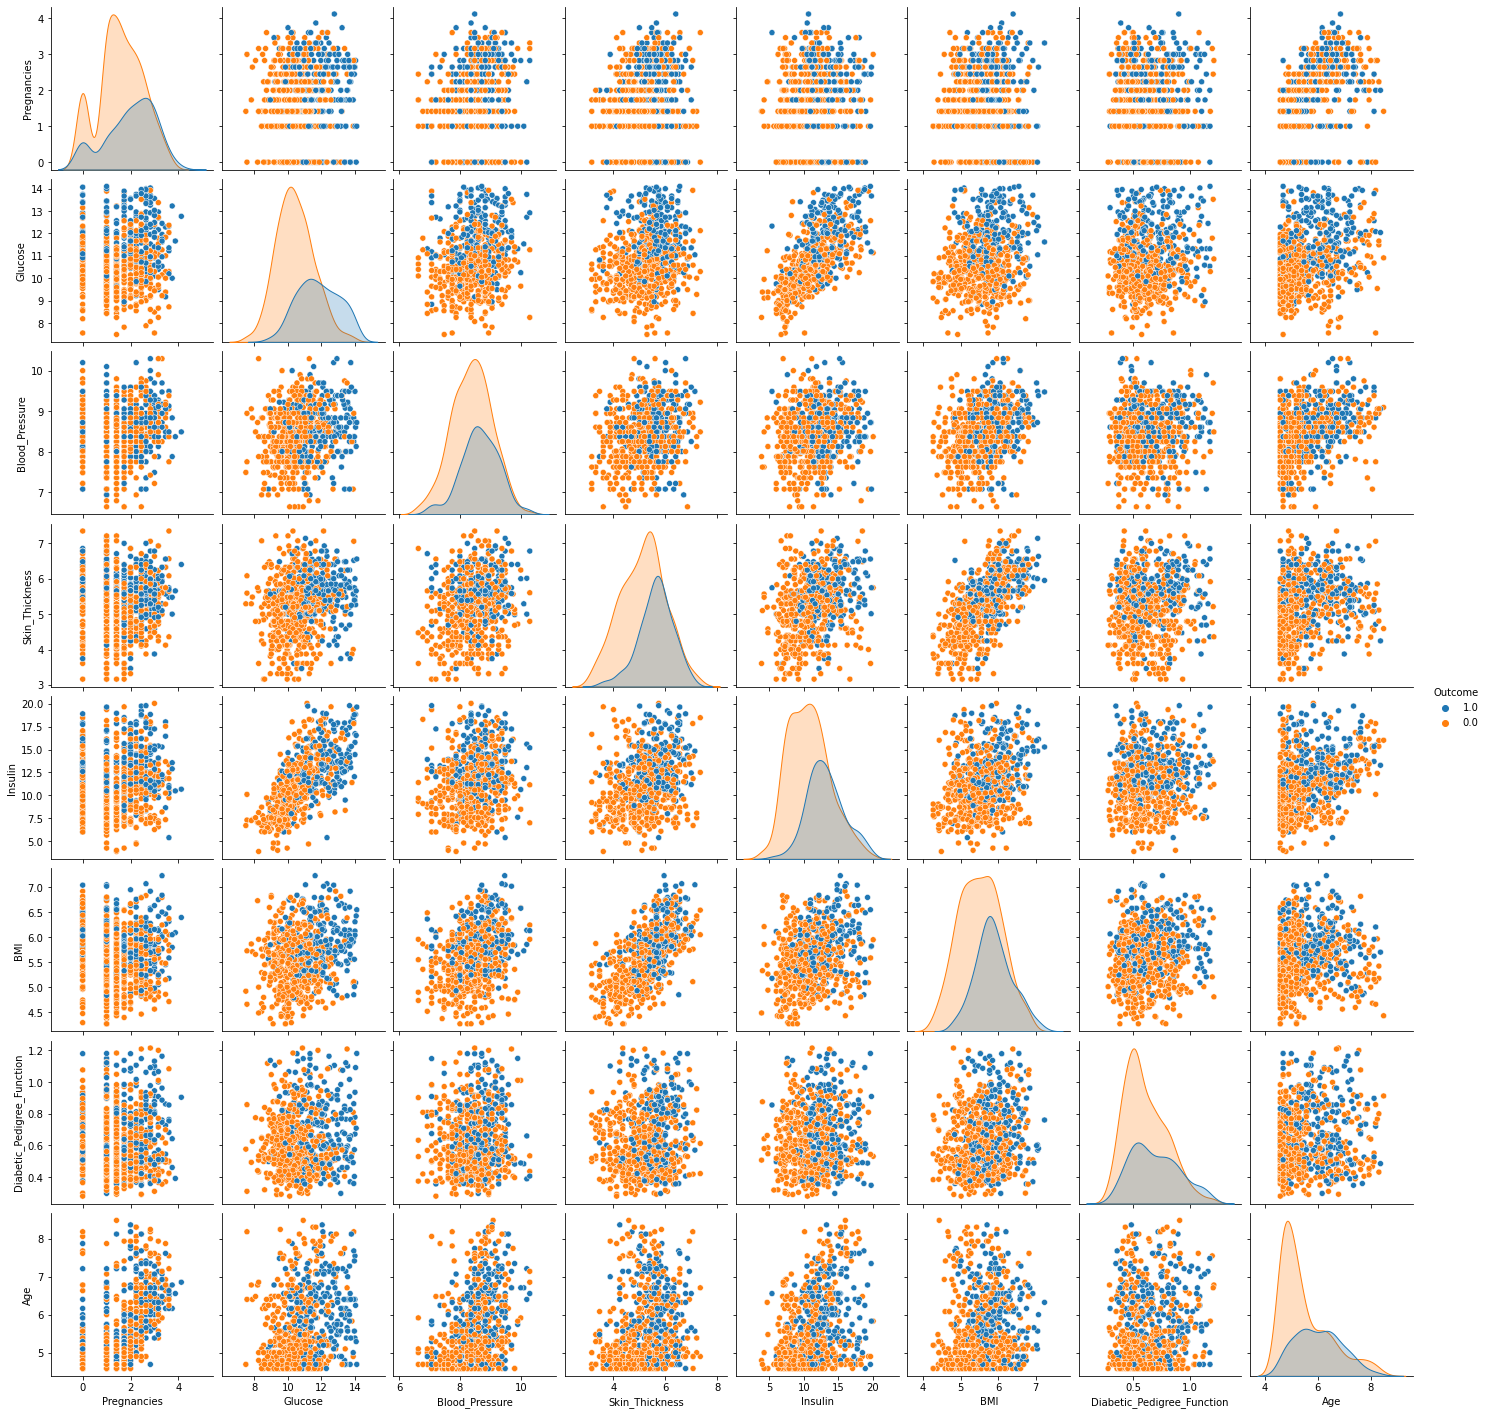

In [30]:
#pairplot has been plotted to check relation of one variable to another variable of the dataset across outcome of the dataset
plt.figure(figsize=(18,18))
sns.pairplot(df_knn_transform,hue='Outcome')
plt.show()

After plotting pairplot, it is seen that most of the women has diabetes when the 'Glucose' is more than 11.

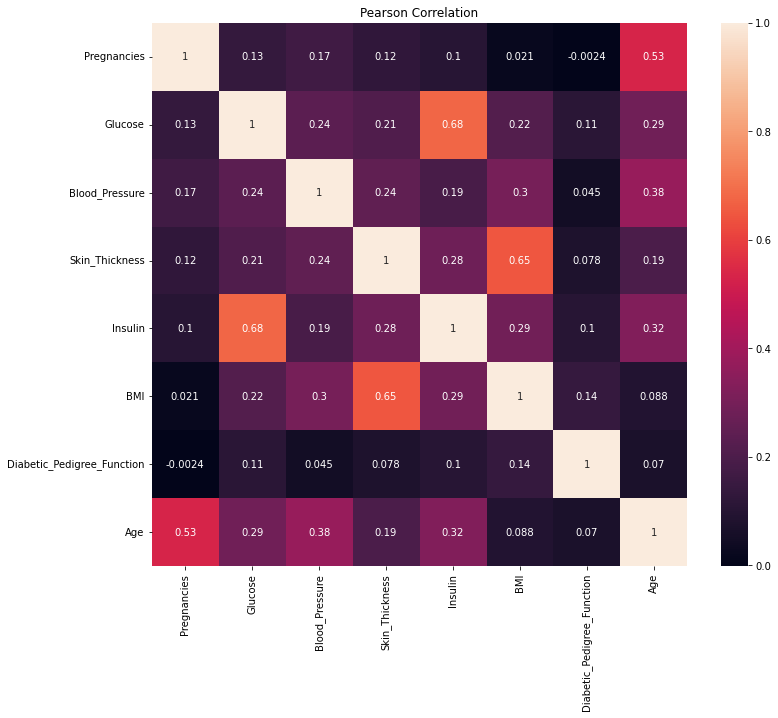

In [31]:
#To check the correlation with between columns of the dataset using Pearson Correlation
plt.figure(figsize=(12,10))
sns.heatmap(df_knn_transform.corr(),annot=True)
plt.title('Pearson Correlation')
plt.show()

After plotting the Pearson Correlation between the columns of the dataset it is found that '**Insulin**' and '**Glucose**' is highly correlated with each other in the dataset followed by '**Skin_Thickness**' and '**BMI**'.